INSTRUCTIONS

The Notebook should contain:
1. The questions you asked 
2. The trends you investigated 
3. The resulting visualizations and conclusions 

Ask the following questions and look for the answers using code and plots:
1. Can you count something interesting?
2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
3. Can you make a bar plot or a histogram?
4. Can you compare two related quantities?
5. Can you make a scatterplot?
6. Can you make a time-series plot?
7. Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?
8. Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

Create slides when completing the coding


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pymatgen import MPRester
from pymatgen.core.structure import Structure
from pymatgen.core.lattice import Lattice

%matplotlib inline

In [2]:
# load the datasets
data_complete = pd.read_csv("./data_complete.csv",index_col=0)
data_k = pd.read_csv("./data_k_processed.csv",index_col=0)
data_mp = pd.read_csv("./data_mp_processed.csv",index_col=0)
data_oqmd = pd.read_csv("./data_oqmd_processed.csv",index_col=0)
data_icsd = pd.read_csv("./data_icsd_processed.csv",index_col=0)
data_complete.info()
data_complete.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31543 entries, 0 to 18503
Data columns (total 5 columns):
formula                      31543 non-null object
structure                    31543 non-null object
spacegroup                   31543 non-null int64
formation_energy_ev_natom    31543 non-null float64
bandgap_energy_ev            31543 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.4+ MB


,formula,structure,spacegroup,formation_energy_ev_natom,bandgap_energy_ev
0,Al5(GaO4)3,Full Formula (Al20 Ga12 O48)\nReduced Formula:...,33,0.0680,3.4387
1,Al5(GaO4)3,Full Formula (Al20 Ga12 O48)\nReduced Formula:...,194,0.2490,2.9210
2,Al13(GaO8)3,Full Formula (Al13 Ga3 O24)\nReduced Formula: ...,227,0.1821,2.7438
3,Al3InO6,Full Formula (Al9 In3 O18)\nReduced Formula: A...,167,0.2172,3.3492
4,In3Ga5O12,Full Formula (In12 Ga20 O48)\nReduced Formula:...,194,0.0505,1.3793


1. Visualize the summary statsistics of formation energies and bandgaps in complete datasets as well as in each subsets from four sources.

In [3]:
# check the summary statistics of the complete dataset and all the others

print("complete dataset")
data_complete.describe()

complete dataset


,spacegroup,formation_energy_ev_natom,bandgap_energy_ev
count,31543.000000,31543.000000,31543.000000
mean,107.592081,-1.298717,1.440845
std,81.400168,1.029570,0.866672
min,1.000000,-4.053535,0.000000
25%,15.000000,-2.107609,0.665000
50%,99.000000,-1.257404,1.382000
75%,186.000000,-0.459231,2.132000
max,230.000000,4.910340,5.853700


In [4]:
# noticed that formation energy ranges from -4.05 to +4.9 
# and bandgap energy ranges from 0 to 5.85
print("kaggle")
data_k.describe()

kaggle


,spacegroup,formation_energy_ev_natom,bandgap_energy_ev
count,2400.000000,2400.000000,2400.000000
mean,141.517917,0.187614,2.077205
std,84.715548,0.104100,1.006845
min,12.000000,0.000000,0.000100
25%,33.000000,0.105600,1.278500
50%,194.000000,0.181800,1.907850
75%,206.000000,0.256275,2.761950
max,227.000000,0.657200,5.286100


In [5]:
print("materials project")
data_mp.describe()

materials project


,spacegroup,formation_energy_ev_natom,bandgap_energy_ev
count,1284.000000,1284.000000,1284.000000
mean,82.585670,-1.960596,0.901729
std,77.717946,0.876605,1.155783
min,1.000000,-3.955974,0.000000
25%,12.000000,-2.507882,0.000000
50%,62.000000,-1.816382,0.357150
75%,160.000000,-1.426968,1.527650
max,229.000000,2.401276,5.853700


In [6]:
print("icsd")
data_icsd.describe()

icsd


,spacegroup,formation_energy_ev_natom,bandgap_energy_ev
count,9357.000000,9357.000000,9357.000000
mean,87.964305,-1.394988,1.571003
std,73.541002,0.885541,0.780751
min,1.000000,-4.008627,0.122000
25%,14.000000,-2.046327,0.918000
50%,62.000000,-1.303710,1.577000
75%,156.000000,-0.675156,2.230000
max,229.000000,4.489924,3.000000


In [7]:
print("oqmd")
data_oqmd.describe()

oqmd


,spacegroup,formation_energy_ev_natom,bandgap_energy_ev
count,18504.000000,18504.000000,18504.000000
mean,114.851383,-1.360063,1.329831
std,82.286701,3.713958,0.809074
min,1.000000,-4.053535,0.101000
25%,29.000000,-2.215495,0.593000
50%,123.000000,-1.410662,1.225000
75%,216.000000,-0.545360,2.006000
max,230.000000,384.229115,3.000000


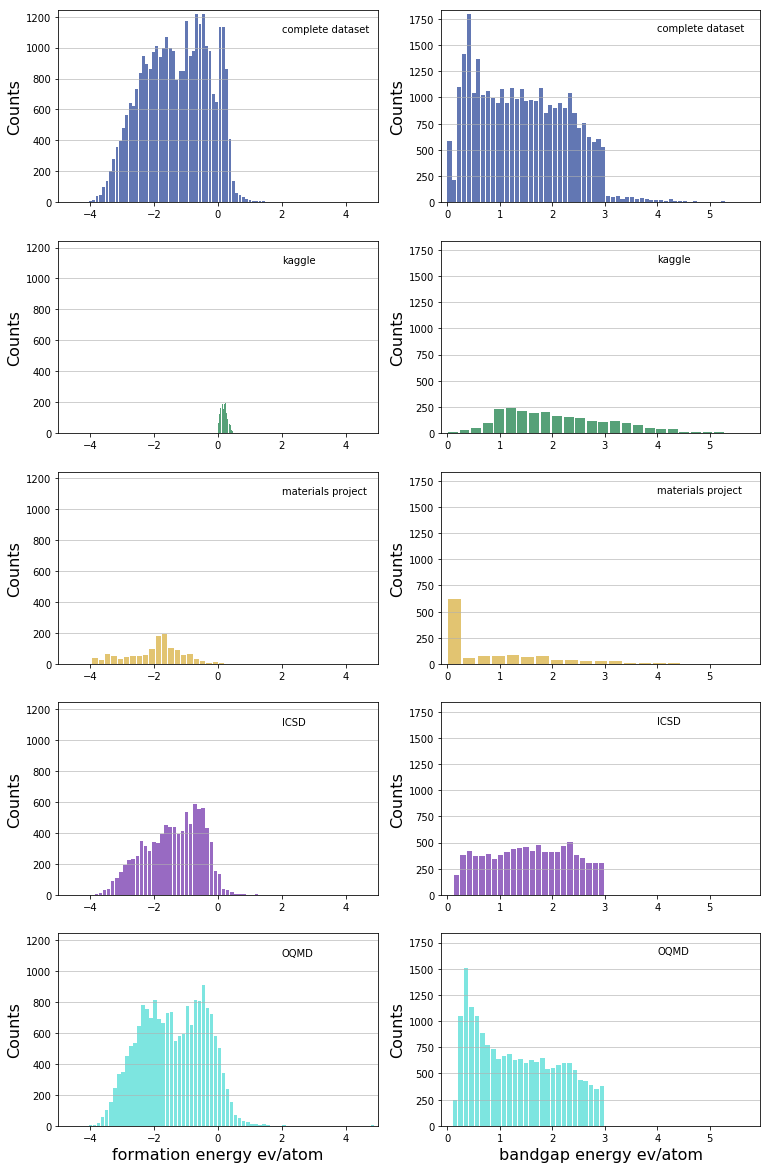

In [8]:
# --------------------- #
#                       #
#    visualization      #
#                       #
# --------------------- #

# set a global fontsize for all the titles and labels of figures 
fontsize = 16

# set legend
legend1 = "complete dataset"
legend2 = "kaggle"
legend3 = 'materials project'
legend4 = "ICSD"
legend5 = "OQMD"

# visualize the distribution of formation energies
ax1 = plt.subplot(5, 2, 1)
ax1.set_xlim([-5, 5])

n, bins, patches = plt.hist(x=data_complete['formation_energy_ev_natom'], 
         bins='auto', color='#1f3e93',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Counts',fontsize = fontsize)
plt.margins(0.02)
plt.text(2,1100,legend1)

# visualize the distribution of bandgaps
ax2 = plt.subplot(5, 2, 2)
n, bins, patches = plt.hist(x=data_complete['bandgap_energy_ev'], 
         bins='auto', color='#1f3e93',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Counts',fontsize = fontsize)
plt.margins(0.02)
plt.text(4,1635,legend1)

# visualize the distribution of formation energies in kaggle dataset
ax3 = plt.subplot(5, 2, 3, sharex=ax1, sharey=ax1)
n, bins, patches = plt.hist(x=data_k['formation_energy_ev_natom'], 
         bins='auto', color='#0f7a3f',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Counts',fontsize = fontsize)
plt.margins(0.02)
plt.text(2,1100,legend2)

# visualize the distribution of bandgaps in kaggle dataset
ax4 = plt.subplot(5, 2, 4,sharex=ax2, sharey=ax2)
n, bins, patches = plt.hist(x=data_k['bandgap_energy_ev'], 
         bins='auto', color='#0f7a3f',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Counts',fontsize = fontsize)
plt.margins(0.02)
plt.text(4,1635,legend2)

# visualize the distribution of formation energies in materials project dataset
ax5 = plt.subplot(5, 2, 5,sharex=ax1, sharey=ax1)
n, bins, patches = plt.hist(x=data_mp['formation_energy_ev_natom'], 
         bins='auto', color='#d6ab35',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Counts',fontsize = fontsize)
plt.margins(0.02)
plt.text(2,1100,legend3)

# visualize the distribution of bandgaps in materials project dataset
ax6 = plt.subplot(5, 2, 6,sharex=ax2, sharey=ax2)
n, bins, patches = plt.hist(x=data_mp['bandgap_energy_ev'], 
         bins='auto', color='#d6ab35',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Counts',fontsize = fontsize)
plt.margins(0.02)
plt.text(4,1635,legend3)

# visualize the distribution of formation energies in icsd dataset
ax7 = plt.subplot(5, 2, 7,sharex=ax1, sharey=ax1)
n, bins, patches = plt.hist(x=data_icsd['formation_energy_ev_natom'], 
         bins='auto', color='#6c2ba8',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Counts',fontsize = fontsize)
plt.margins(0.02)
plt.text(2,1100,legend4)

# visualize the distribution of bandgaps in icsd dataset
ax8 = plt.subplot(5, 2, 8,sharex=ax2, sharey=ax2)
n, bins, patches = plt.hist(x=data_icsd['bandgap_energy_ev'], 
         bins='auto', color='#6c2ba8',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)

plt.ylabel('Counts',fontsize = fontsize)
plt.margins(0.02)
plt.text(4,1635,legend4)

# visualize the distribution of formation energies in oqmd dataset
ax9 = plt.subplot(5, 2, 9,sharex=ax1, sharey=ax1)
n, bins, patches = plt.hist(x=data_oqmd['formation_energy_ev_natom'], 
         bins='auto', color='#46dbd3',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('formation energy ev/atom',fontsize = fontsize)
plt.ylabel('Counts',fontsize = fontsize)
plt.margins(0.02)
plt.text(2,1100,legend5)

# visualize the distribution of bandgaps in oqmd  dataset
ax10 = plt.subplot(5, 2, 10,sharex=ax2, sharey=ax2)
n, bins, patches = plt.hist(x=data_oqmd['bandgap_energy_ev'], 
         bins='auto', color='#46dbd3',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('bandgap energy ev/atom',fontsize = fontsize)
plt.ylabel('Counts',fontsize = fontsize)
plt.margins(0.02)
plt.text(4,1635,legend5)

plt.subplots_adjust(right=1.75, top=4)

Thoughts on point 1: 

We have 31,543(~32K) entries in the complete dataset in which their formation energies ranging from -4.05 to 4.91 eV with the standard deviation of 1.03. The negative formation energy indicates that the formation of a compound is exothermic(the amount of energy it takes to break bonds is less than the amount of energy that is released when making the bonds) while a positive formation energy indicates that the formation of a compound is endothermic(the amount of energy it takes to break bonds is greater than the amount of energy that is released when making the bonds). Formation energy is one of the most important properties of a compound that is directly related to its stability. More negative the formation energy, the more stable the compound is likely to be.[1] Bandgaps in complete dataset range from 0 to 5.87 eV with he standard deviation of 0.87, indicating that the collected materials are either conductors or semiconductors. 


the distribution of bandgaps from kaggle has a bell shape and is close to a normal distribution, while the distribution of bandgaps from materials project has more aound 350/827 entires having bandgap close to 0, which indicates they are conductors.

Based on summary statistics, we have a large enough range of formation energies and positive bangaps as negative value is physically meaningless.

Grouping the complete data based on sources, it has been found that dataset from kaggle repository has positive formation energies from 0 to 0.66 eV with standard deviation of 0.10 eV; positive bandgaps are from 0 to 5.29 eV with the mean of 2.08 eV and standard deviation of 1.0 eV. Formation energies from materials project include negative values and range from -3.95 to 2.4 eV with standard deviation of 0.88 eV. Its bandgaps 0 to 5.85 eV with standard deviation of 1.16 eV. The interesting observation here is that dataset from materials project has ~350/827(~42%) entries with bandgap close to 0 eV, indicating almost a half of the componds collected are conductors.

For datasets from ICSD(Inorganic Crystal Structure Database) has a large range of formation energies(-4.01 to 4.49 eV with standard deviation 0.88 eV) and bandgaps from 0.12 eV up to 3 eV with a standard deviation of 0.78 eV. The clean cutoff of bandgaps at 3 eV is to intentionally have most of the materials in this project to be semicondutors(compounds with an intermediate bandgap), as the project is searching for promising photocatalysts which generates catalytic activity by adsorbing light. This cutoff also applies to data from OQMD(Open Quantum Materials Database) which results in its bandgaps ranging from 1.33 eV to 3 eV.

Anomalies have been detected in the data subset from OQMD. While the minimum formation energy of this dataset seems normal(-4.05 eV), the maximum formation energy shoots up to 384.23 eV. Based on our chemical intuitions, formation energy larger than 5 eV/atom is unreasonable. So we will generate a scatter plot(Figure 2) of formation_energy_ev_natom from OQMD vs. bandgap_energy_ev to locate the anomalies. The scatter plot clearly shows that there are two anomalies. We then take a closer look at these two anomalies by filtering the pandas dataframe(see below) and identify that one anomaly is YbHfO3 having the formation energy of 294.55 eV and the other is YbZrO3 with formation energy of 384.23 eV. These two anomalies are dropped from oqmd and complete datasets for improved data quality.

,formula,structure,spacegroup,formation_energy_ev_natom,bandgap_energy_ev
12289,YbHfO3,Full Formula (Yb1 Hf1 O3)\nReduced Formula: Yb...,99,294.545550,0.918
12372,YbZrO3,Full Formula (Yb1 Zr1 O3)\nReduced Formula: Yb...,99,384.229115,0.668


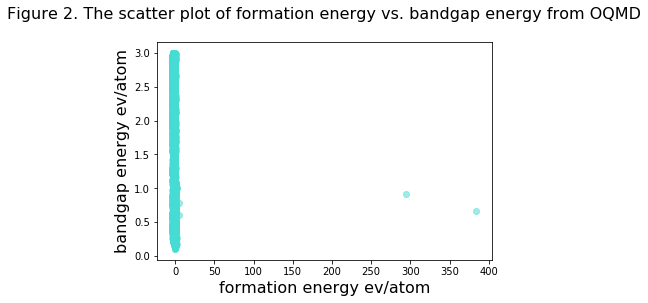

In [9]:
# scatter plot of formation_energy_ev_natom from OQMD vs. bandgap_energy_ev
plt.scatter(data_oqmd['formation_energy_ev_natom'], 
            data_oqmd['bandgap_energy_ev'], 
            c='#46dbd3', alpha=0.5)

plt.xlabel('formation energy ev/atom',fontsize = fontsize)
plt.ylabel('bandgap energy ev/atom',fontsize = fontsize)
plt.title('Figure 2. The scatter plot of formation energy vs. bandgap energy from OQMD\n',
          fontsize = fontsize)

# identify two anomalies

anomalies_oqmd = data_oqmd[data_oqmd['formation_energy_ev_natom'] > 100]
anomalies_oqmd

In [10]:
# drop two anomalies from oqmd and complete datasets
data_oqmd = data_oqmd[data_oqmd['formation_energy_ev_natom'] < 100]
data_complete = data_complete[data_complete['formation_energy_ev_natom'] < 100]

Question 2. Are formation energies and bandgaps two independent targets?

Text(0.5, 1.0, 'The scatter plot of formation energy vs. bandgap energy in the complete dataset\n')

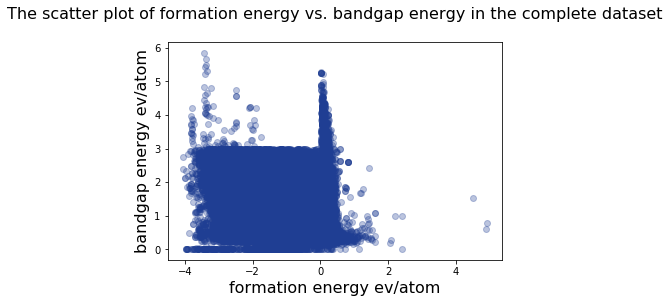

In [14]:
plt.scatter(data_complete['formation_energy_ev_natom'], 
            data_complete['bandgap_energy_ev'], 
            c='#1f3e93', alpha=0.3)

plt.xlabel('formation energy ev/atom',fontsize = fontsize)
plt.ylabel('bandgap energy ev/atom',fontsize = fontsize)
plt.title('The scatter plot of formation energy vs. bandgap energy in the complete dataset\n',
          fontsize = fontsize)

Question 3. Correlation between spacegroup and formation energy, spacegroup and bandgaps

relationship between features and target values
scatter, box plots
general introduction to the data 
